In [2]:
from shapely.geometry import Polygon, MultiPolygon
import shapely.geometry as geo
import shapely.affinity as af
from matplotlib import pyplot as plot
import numpy as np

Define a tesselation of two squares adjacent to each other, on the same base line.
On top of this define a square grid (simple tesselation) at an angle

In [3]:
size= (4, 3)

/Users/kevinh/hubprojects/penrose/fixenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


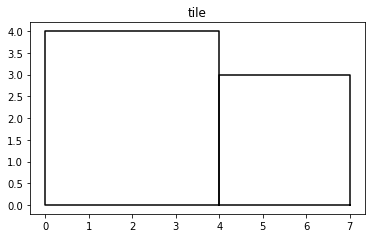

In [4]:
tile= MultiPolygon (
    [geo.box(0,0,size[0],size[0]),
    geo.box(size[0],0,size[0]+size[1],size[1]),
    ])

def plot_tile( plot, tile, color='black'):
    for p in tile.geoms:    
        x,y= p.exterior.xy
        plot.plot(x,y, color=color)

plot_tile(plot,  tile)
plot.title("tile")
plot.axes().set_aspect('equal')
plot.show()

/Users/kevinh/hubprojects/penrose/fixenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


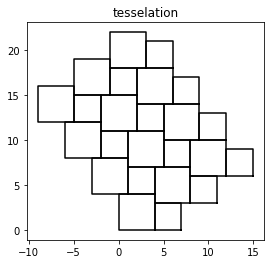

In [5]:
tess=[]
def tesselate(plot,tile,xsize=3,ysize=4):
    for x in range(xsize):
        for y in range(ysize):
            t= af.translate( tile, x*size[0]-y*size[1], y*size[0]+ x*size[1])
            plot_tile(plot, t)
tesselate(plot, tile)
plot.title('tesselation')
plot.axes().set_aspect('equal')
plot.show()

Now overlay a square grid.
The correct sizes are to use pythag to calculate the size of the line joining the two box corners, and to use trig to determine the angle between the corners.

/Users/kevinh/hubprojects/penrose/fixenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


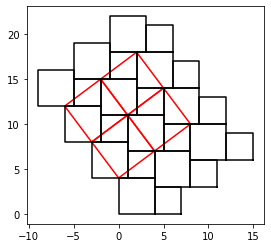

In [6]:
gridsize= np.sqrt( np.square(size[0]) + np.square(size[1]))
gridangle= np.rad2deg(np.arctan( size[1] / size[0], ))
box= geo.box(0,0,gridsize, gridsize)

def translate(box, x, y):
    return af.translate(box, gridsize*x,gridsize*y,)
grid= MultiPolygon([translate(box,x,y) for x in range(2) for y in range(2)])

grid=af.rotate(grid, angle=gridangle, origin=(0,0))
gridoffset=(0,size[0])
grid= af.translate( grid, gridoffset[0], gridoffset[1])

plot_tile(plot, grid, color='red')
plot.axes().set_aspect('equal')
tesselate(plot, tile)
plot.show()

From this it is obvious visually that the boxes made by joining the corners of the two little boxes covers the same area as the little boxes. I.e. the square on the angle of the triangle is equal to the other two squares.

To do: use the shapely commands to test the polygon coverage:
- no overlap within the tile 
- complete overlap within the tesselation
- complete overlap of the tesselation with the grid